In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# Load and clean data
bitcoin = pd.read_csv('../data/BTC-USD.csv')
bitcoin.columns = bitcoin.columns.str.lower().str.replace(' ','_')
bitcoin['currency'] = "BTC"

ethereum = pd.read_csv('../data/ETH-USD.csv')
ethereum.columns = ethereum.columns.str.lower().str.replace(' ','_')
ethereum['currency'] = "ETH"

crypto = pd.concat([bitcoin, ethereum], ignore_index=True)
crypto['date'] = pd.to_datetime(crypto['date'])

crypto.head()

,date,open,high,low,close,adj_close,volume,currency
0,2015-01-01,320.434998,320.434998,171.509995,217.464005,217.464005,1098811912,BTC
1,2015-02-01,216.867004,265.610992,212.014999,254.263000,254.263000,711518700,BTC
2,2015-03-01,254.283005,300.044006,236.514999,244.223999,244.223999,959098300,BTC
3,2015-04-01,244.223007,261.798004,214.873993,236.145004,236.145004,672338700,BTC
4,2015-05-01,235.938995,247.804001,228.572998,230.190002,230.190002,568122600,BTC


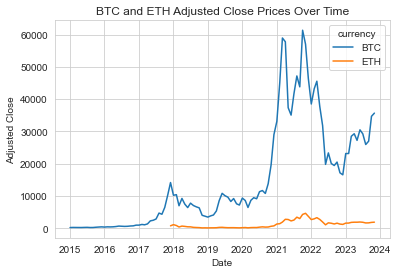

In [13]:
sns.lineplot(x='date', y='adj_close', hue='currency', data=crypto)

plt.title('BTC and ETH Adjusted Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close')

plt.show()

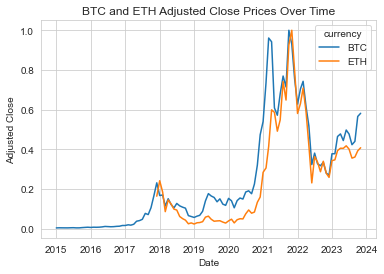

In [12]:
btc_max = crypto[crypto['currency'] == 'BTC']['adj_close'].max()
eth_max = crypto[crypto['currency'] == 'ETH']['adj_close'].max()
crypto['adj_close_norm'] = crypto.apply(lambda row: row['adj_close'] / btc_max if row['currency'] == 'BTC' else row['adj_close'] / eth_max, axis=1)
sns.lineplot(x='date', y='adj_close_norm', hue='currency', data=crypto)

plt.title('BTC and ETH Adjusted Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Normalized')

plt.show()